In [23]:
import pandas as pd
import numpy as np

In [3]:
fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [5]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [8]:
pd.unique(fish['Species'])

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [9]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()

In [10]:
fish_input[:5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [11]:
fish_target = fish['Species'].to_numpy()

In [12]:
fish_target[:5]

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

In [13]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [15]:
print(train_input.shape, test_input.shape, train_target.shape, test_target.shape)

(119, 5) (40, 5) (119,) (40,)


In [17]:
train_target

array(['Bream', 'Pike', 'Smelt', 'Perch', 'Parkki', 'Roach', 'Perch',
       'Bream', 'Perch', 'Perch', 'Perch', 'Bream', 'Perch', 'Parkki',
       'Perch', 'Bream', 'Smelt', 'Perch', 'Roach', 'Bream', 'Pike',
       'Bream', 'Pike', 'Perch', 'Parkki', 'Bream', 'Perch', 'Pike',
       'Bream', 'Perch', 'Parkki', 'Roach', 'Perch', 'Bream', 'Roach',
       'Perch', 'Bream', 'Bream', 'Perch', 'Perch', 'Roach', 'Pike',
       'Perch', 'Smelt', 'Pike', 'Roach', 'Perch', 'Parkki', 'Perch',
       'Bream', 'Perch', 'Smelt', 'Perch', 'Parkki', 'Smelt', 'Perch',
       'Perch', 'Roach', 'Bream', 'Perch', 'Perch', 'Roach', 'Roach',
       'Perch', 'Perch', 'Bream', 'Roach', 'Bream', 'Roach', 'Parkki',
       'Perch', 'Perch', 'Perch', 'Perch', 'Pike', 'Pike', 'Perch',
       'Bream', 'Perch', 'Bream', 'Whitefish', 'Pike', 'Bream', 'Bream',
       'Roach', 'Perch', 'Pike', 'Bream', 'Pike', 'Parkki', 'Roach',
       'Perch', 'Roach', 'Smelt', 'Whitefish', 'Roach', 'Perch', 'Bream',
       'Whitefi

In [16]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [19]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [20]:
kn.predict(test_scaled[:10])

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch', 'Bream', 'Smelt',
       'Roach', 'Perch', 'Pike'], dtype=object)

In [21]:
test_target[:10]

array(['Perch', 'Smelt', 'Pike', 'Whitefish', 'Perch', 'Bream', 'Smelt',
       'Roach', 'Perch', 'Pike'], dtype=object)

In [24]:
proba = kn.predict_proba(test_scaled[:5])
np.round(proba, decimals=4)

array([[0.    , 0.    , 1.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 1.    , 0.    ],
       [0.    , 0.    , 0.    , 1.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ]])

In [30]:
distances, indices = kn.kneighbors(test_scaled[3:4])
print(train_target[indices])

[['Roach' 'Perch' 'Perch']]


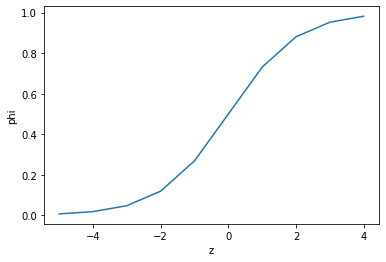

In [33]:
# sigmoid graph

import matplotlib.pyplot as plt


z = np.arange(-5, 5, 1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

In [36]:
bream_smelt_indices = (train_target == 'Bream') | (train_target == 'Smelt')
train_input_bream_smelt = train_scaled[bream_smelt_indices]
train_target_bream_smelt = train_target[bream_smelt_indices]


In [39]:
bream_smelt_indices_test = (test_target == 'Bream') | (test_target == 'Smelt')

test_input_bream_smelt = test_scaled[bream_smelt_indices_test]
test_target_bream_smelt = test_target[bream_smelt_indices_test]


In [40]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_input_bream_smelt, train_target_bream_smelt)

LogisticRegression()

In [41]:
lr.score(train_input_bream_smelt, train_target_bream_smelt)

1.0

In [43]:
lr.predict_proba(train_input_bream_smelt[:5])

array([[0.99759855, 0.00240145],
       [0.02735183, 0.97264817],
       [0.99486072, 0.00513928],
       [0.98584202, 0.01415798],
       [0.99767269, 0.00232731]])

In [44]:
lr.classes_

array(['Bream', 'Smelt'], dtype=object)

In [46]:
lr.predict(train_input_bream_smelt[:5])

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream'], dtype=object)

In [48]:
decisions = lr.decision_function(train_input_bream_smelt[:5])
decisions

array([-6.02927744,  3.57123907, -5.26568906, -4.24321775, -6.0607117 ])

In [49]:
from scipy.special import expit

expit(decisions)


array([0.00240145, 0.97264817, 0.00513928, 0.01415798, 0.00232731])

In [51]:
lr = LogisticRegression(C=20, max_iter = 1000)
lr.fit(train_scaled, train_target)

LogisticRegression(C=20, max_iter=1000)

In [52]:
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [54]:
print(lr.predict(test_scaled[10:]))

['Bream' 'Perch' 'Bream' 'Parkki' 'Bream' 'Bream' 'Perch' 'Perch' 'Perch'
 'Bream' 'Smelt' 'Bream' 'Bream' 'Bream' 'Bream' 'Perch' 'Perch' 'Roach'
 'Smelt' 'Smelt' 'Pike' 'Perch' 'Perch' 'Pike' 'Bream' 'Perch' 'Roach'
 'Roach' 'Parkki' 'Perch']


In [58]:
proba = lr.predict_proba(test_scaled[:5])
np.round(proba, decimals=2)

array([[0.  , 0.01, 0.84, 0.  , 0.14, 0.01, 0.  ],
       [0.  , 0.  , 0.04, 0.  , 0.01, 0.95, 0.  ],
       [0.  , 0.  , 0.03, 0.93, 0.02, 0.02, 0.  ],
       [0.01, 0.03, 0.31, 0.01, 0.57, 0.  , 0.08],
       [0.  , 0.  , 0.9 , 0.  , 0.09, 0.  , 0.  ]])

In [59]:
lr.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [60]:
lr.coef_

array([[-1.48987946, -1.02990939,  2.59435574,  7.70317351, -1.20033018],
       [ 0.19634535, -2.00943128, -3.78042851,  6.50475245, -1.99514555],
       [ 3.56251123,  6.34407252, -8.49003194, -5.75747074,  3.79323662],
       [-0.10502289,  3.60283347,  3.93064394, -3.61704943, -1.75100043],
       [-1.40029263, -6.07529094,  5.25937894, -0.87225815,  1.86066954],
       [-1.38534275,  1.49231097,  1.39234243, -5.67722598, -4.40100314],
       [ 0.62168116, -2.32458535, -0.90626061,  1.71607834,  3.69357315]])